In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_theme()
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

# Decomposing Time Series

In [6]:
import pandas as pd
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

1- Download the prices of gold for years 2012-2023 and resample to monthly values

In [9]:
QUANDL_KEY = ''
quandl.ApiConfig.api_key = QUANDL_KEY

df = quandl.get(dataset='WGC/GOLD_MONAVG_USD', start_date='2012-01-01', end_date='2023-12-31')
df.rename(columns={'Value':'price'}, inplace=True)
df = df.resample('M').last()

In [10]:
print(f'Shape of Dataframe: {df.shape}')
df.head()

Shape of Dataframe: (98, 1)


,price
Date,
2012-01-31,1656.12
2012-02-29,1742.62
2012-03-31,1673.77
2012-04-30,1650.07
2012-05-31,1585.50


2- Add rolling mean and standard deviation

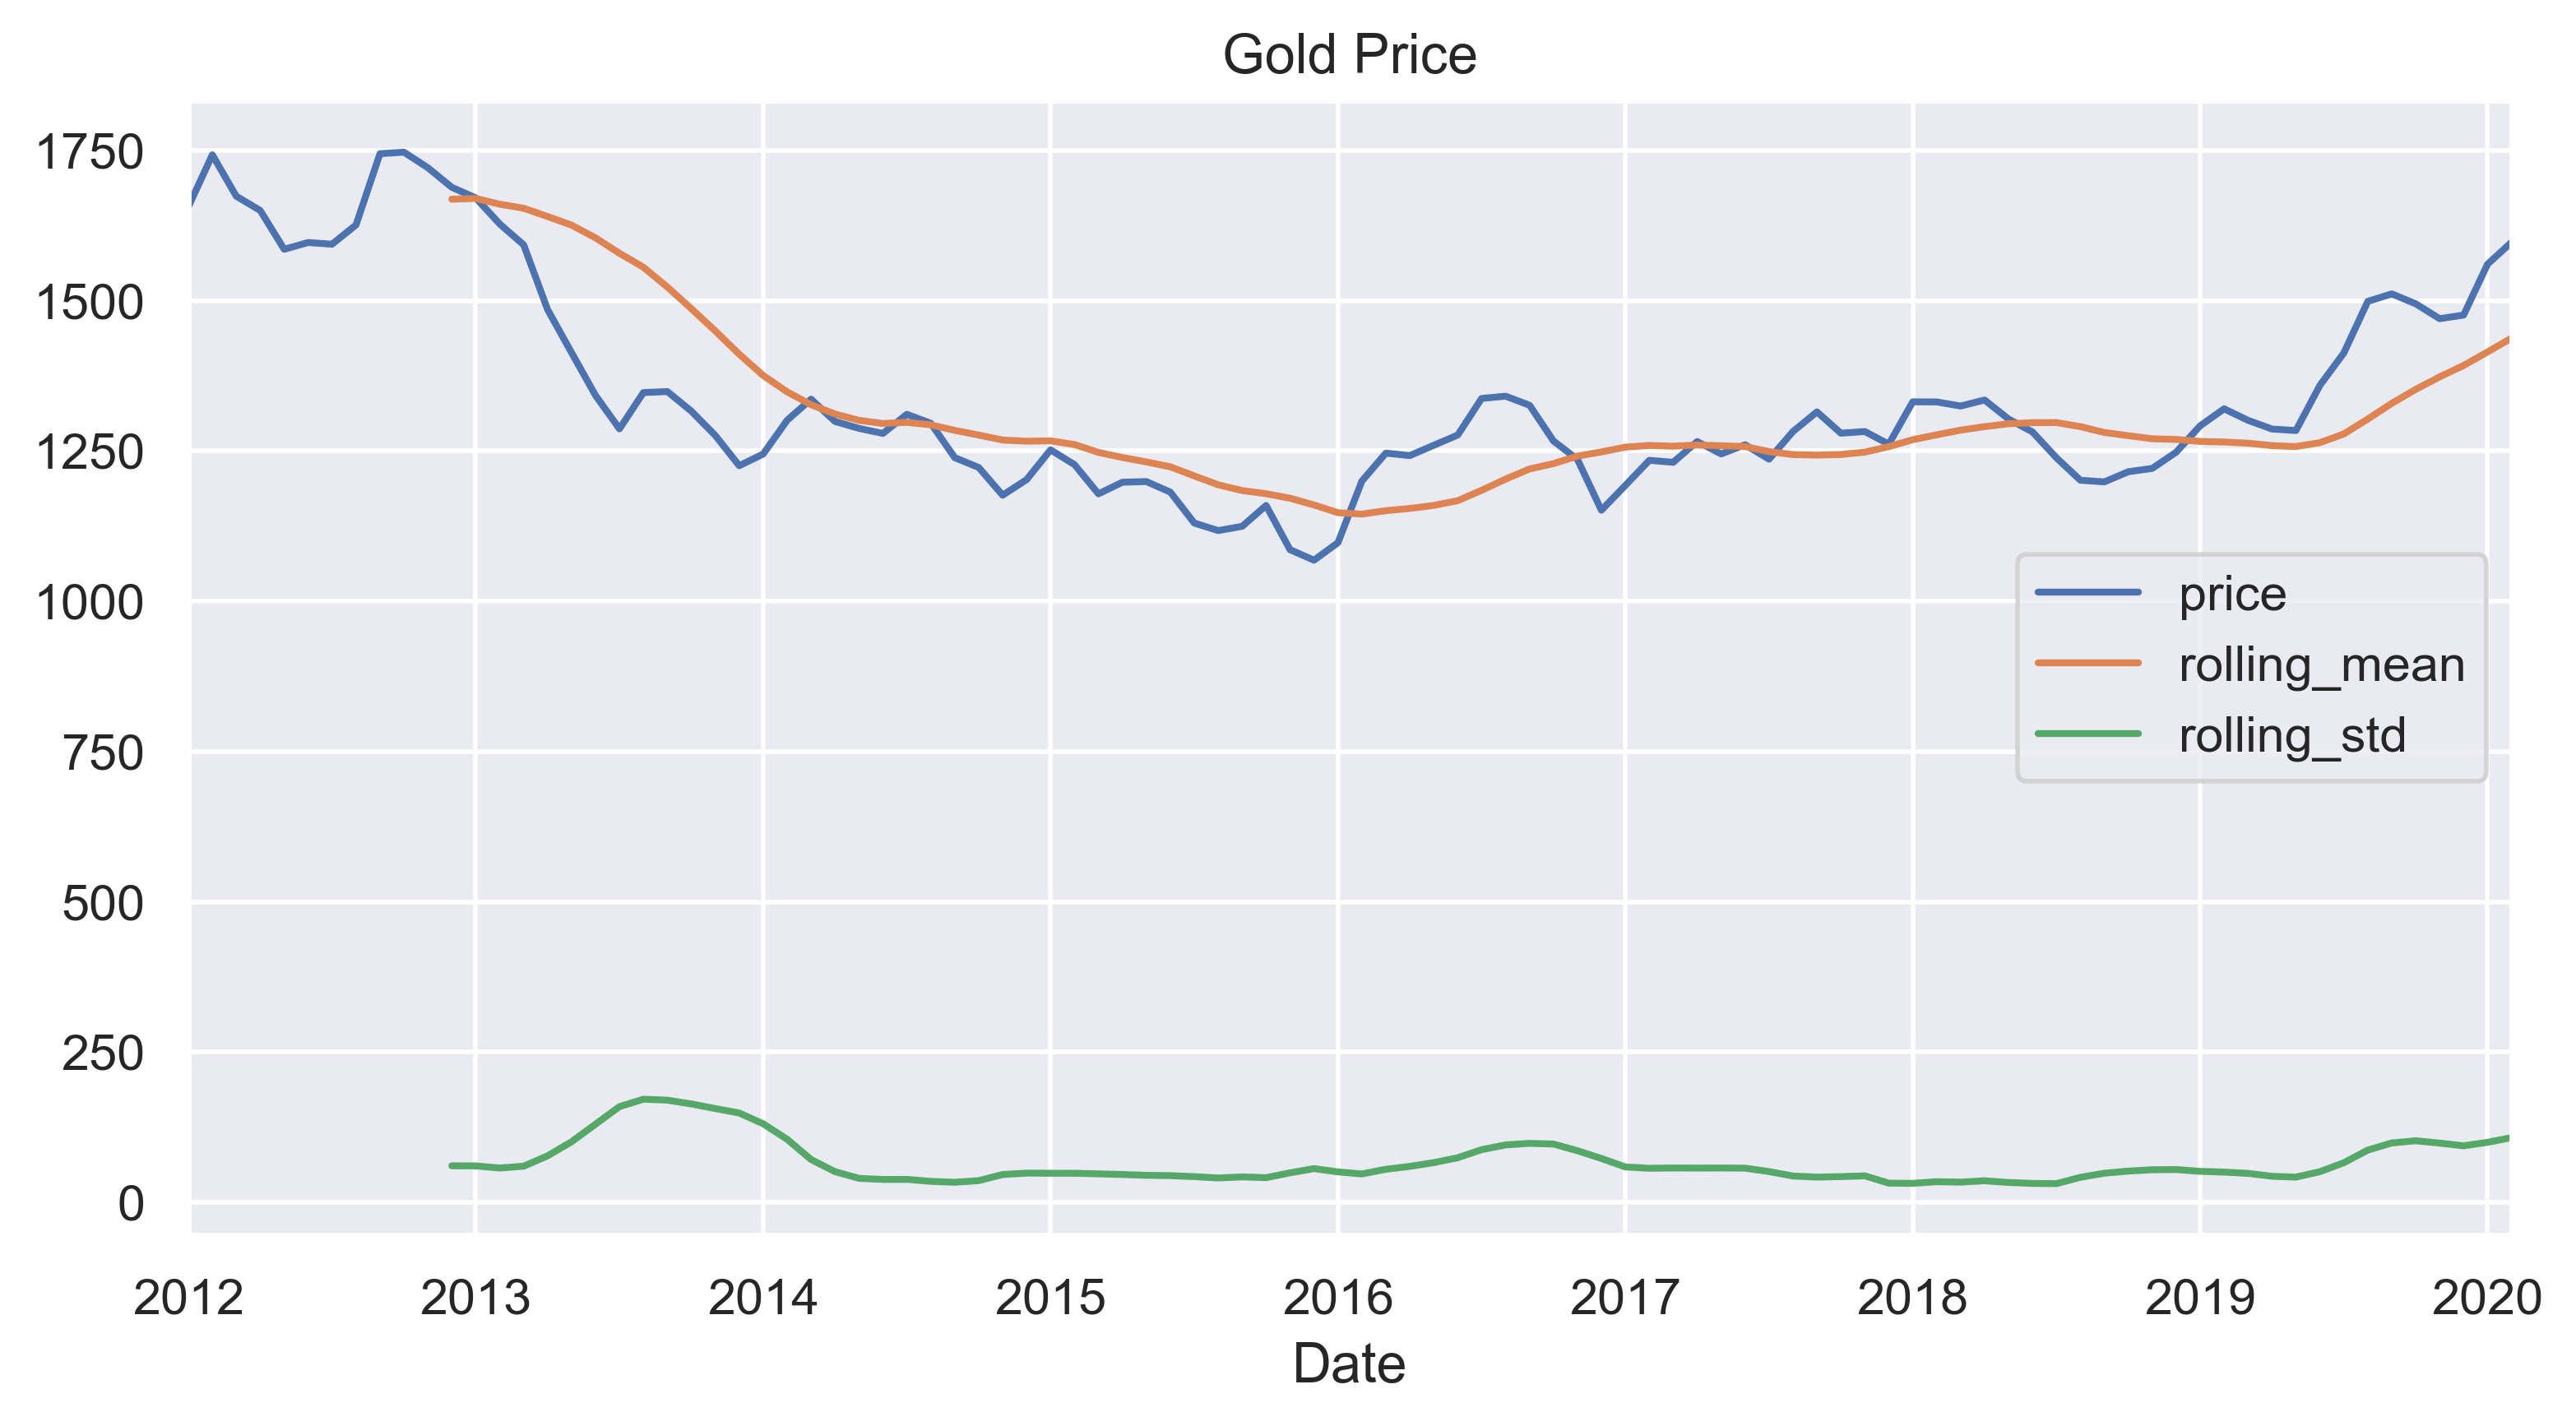

In [20]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='Gold Price')

#plot
plt.tight_layout()
plt.show()

3- Carry out seasonal decomposition using the multiplicative model

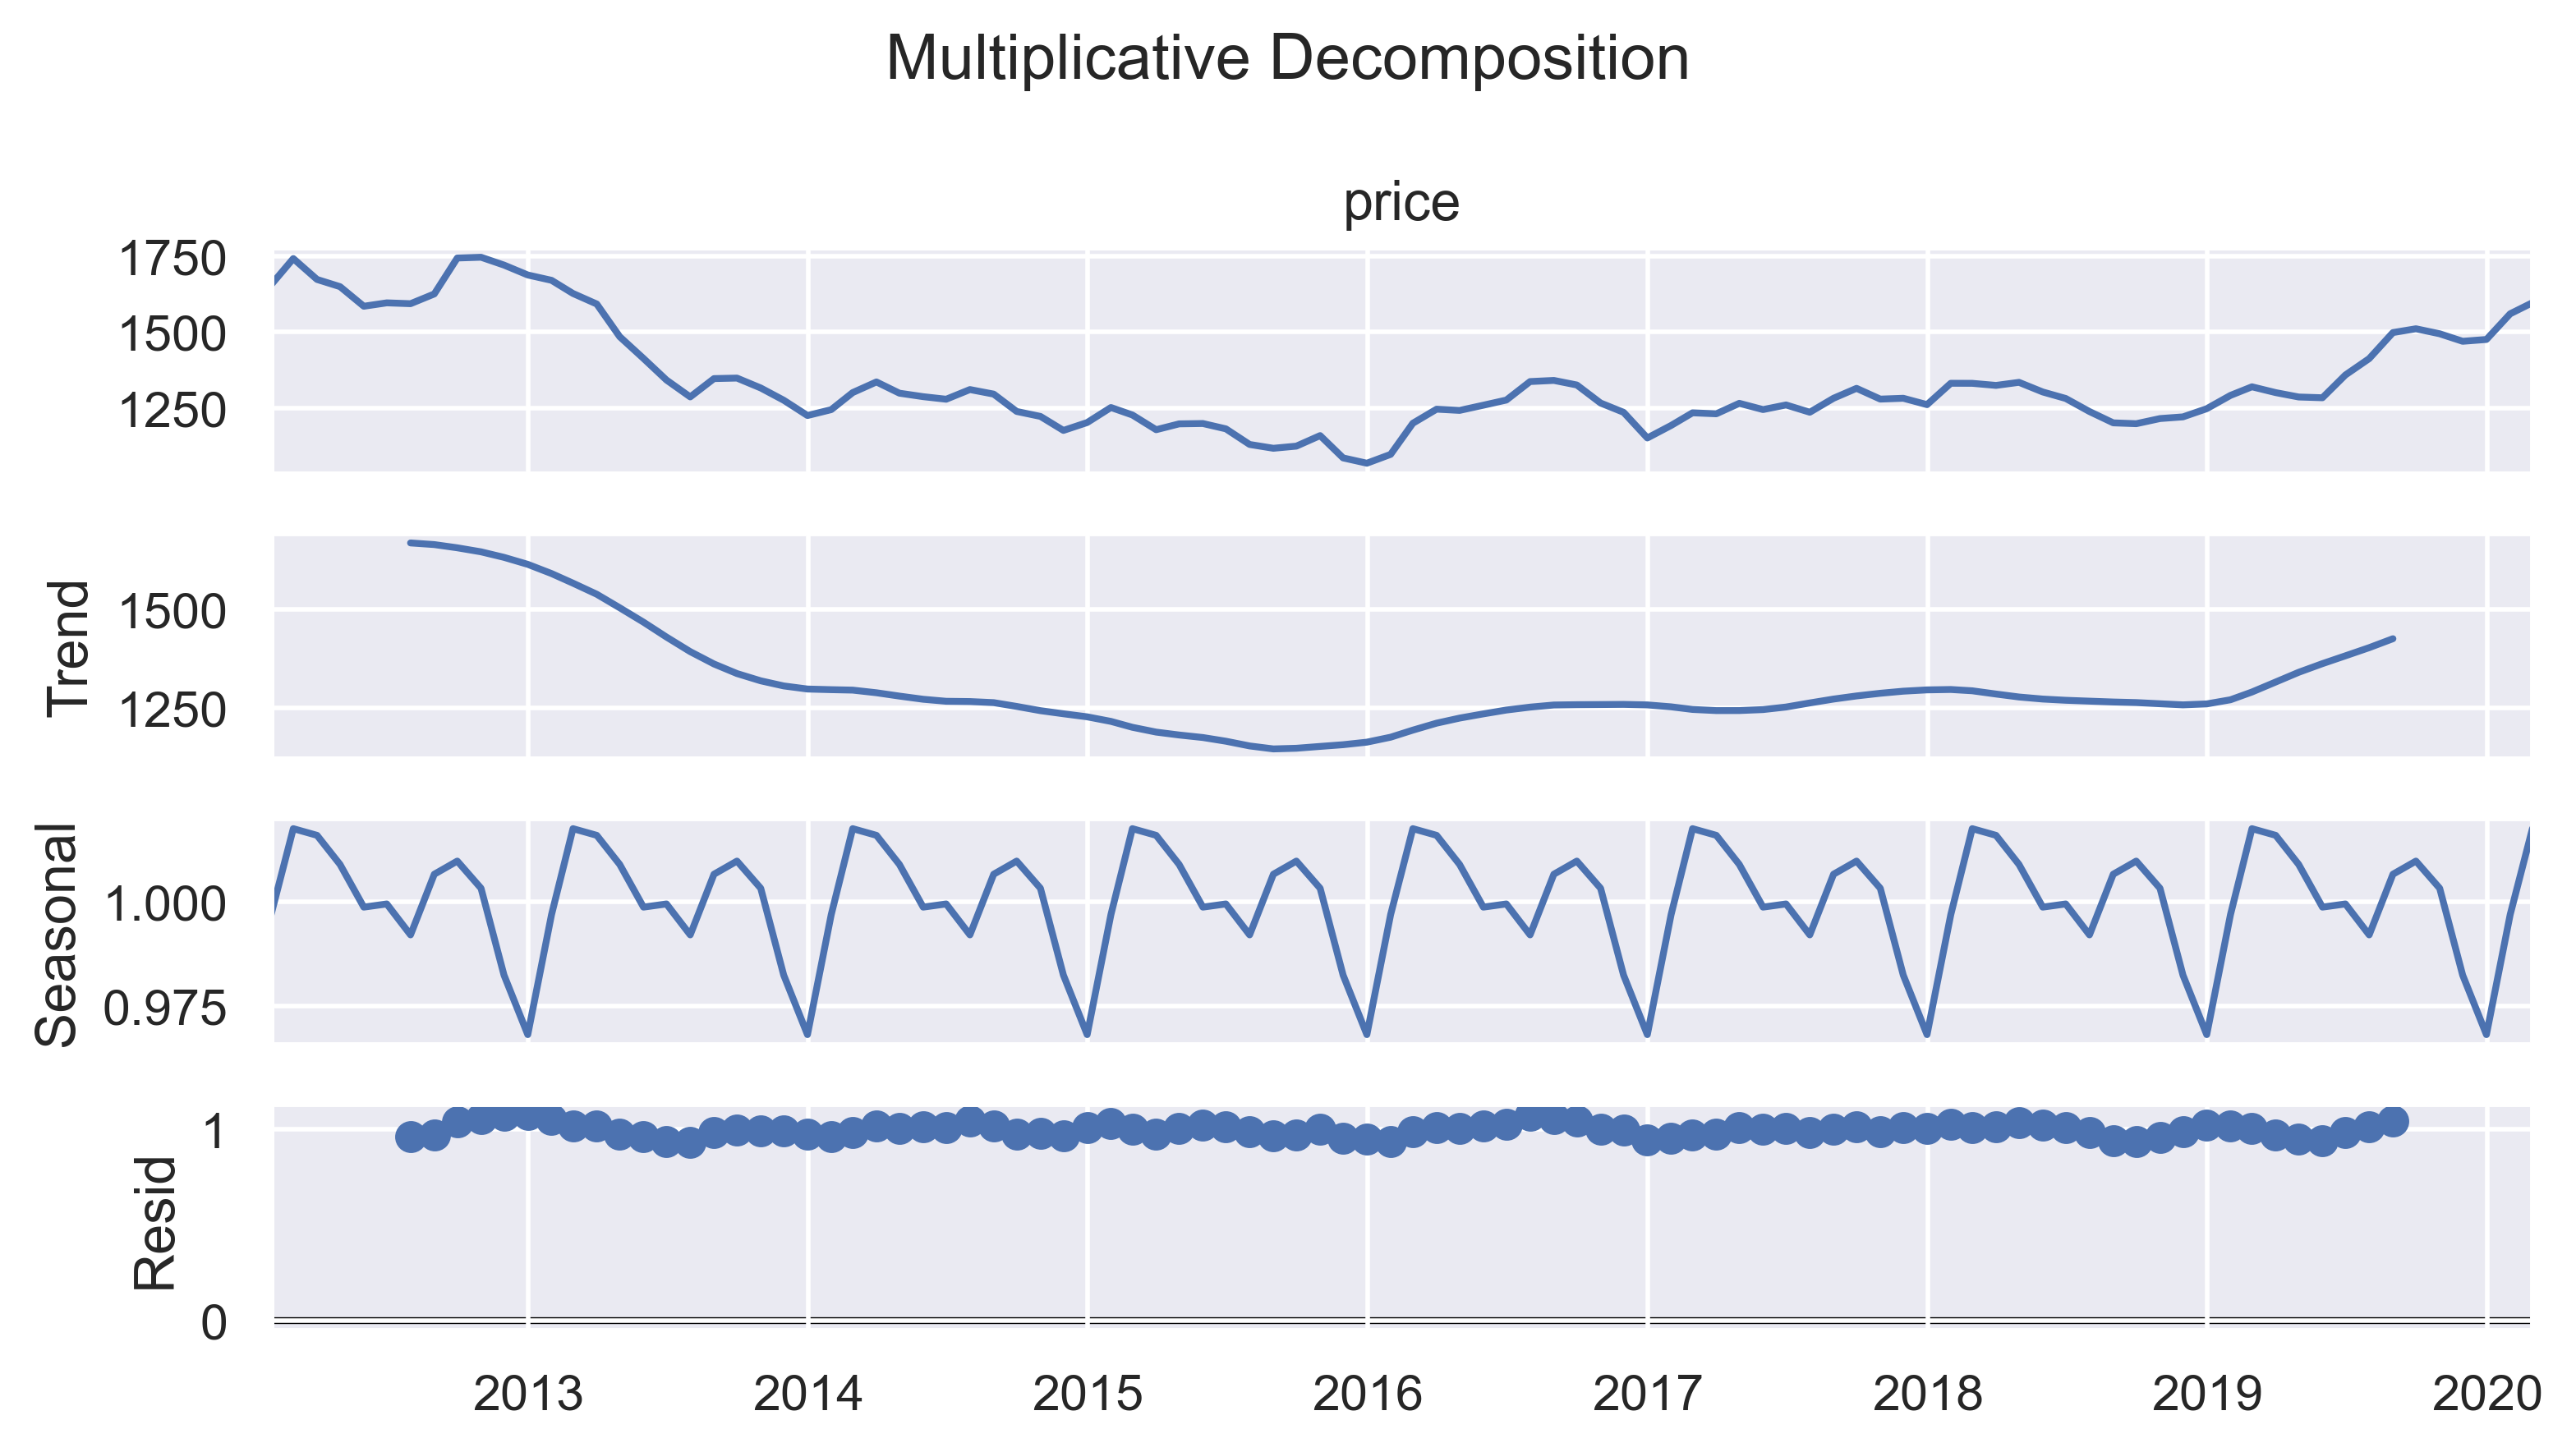

In [21]:
decomposition_results = seasonal_decompose(df.price, model='multiplicative')
decomposition_results.plot().suptitle('Multiplicative Decomposition', fontsize=14)

#plot
plt.tight_layout()
plt.show()